# Step 1: Notebook Setup

In [15]:
# TODO: Make sure you run this cell before continuing!

%matplotlib inline
import matplotlib.pyplot as plt

def show_plot(x_datas, y_datas, x_label, y_label, legend=None, title=None):
    """
    Display a simple line plot.
    
    :param x_data: Numpy array containing data for the X axis
    :param y_data: Numpy array containing data for the Y axis
    :param x_label: Label applied to X axis
    :param y_label: Label applied to Y axis
    """
    fig = plt.figure(figsize=(16,8), dpi=100)
    for (x_data, y_data) in zip(x_datas, y_datas):
        plt.plot(x_data, y_data, '-', marker='|', markersize=2.0, mfc='b')
    plt.grid(b=True, which='major', color='k', linestyle='-')
    plt.xlabel(x_label)
    fig.autofmt_xdate()
    plt.ylabel (y_label)
    if legend:
        plt.legend(legend, loc='upper left')
    if title:
        plt.title(title)
    plt.show()
    return plt
    
def plot_box(bbox):
    """
    Display a Green bounding box on an image of the blue marble.
    
    :param bbox: Shapely Polygon that defines the bounding box to display
    """
    min_lon, min_lat, max_lon, max_lat = bbox.bounds
    import matplotlib.pyplot as plt1
    from matplotlib.patches import Polygon
    from mpl_toolkits.basemap import Basemap

    map = Basemap()
    map.bluemarble(scale=0.5)
    poly = Polygon([(min_lon,min_lat),(min_lon,max_lat),(max_lon,max_lat),
                    (max_lon,min_lat)],facecolor=(0,0,0,0.0),edgecolor='green',linewidth=2)
    plt1.gca().add_patch(poly)
    plt1.gcf().set_size_inches(15,25)
    
    plt1.show()
    
def show_plot_two_series(x_data_a, x_data_b, y_data_a, y_data_b, x_label, y_label_a, 
                         y_label_b, series_a_label, series_b_label, align_axis=True):
    """
    Display a line plot of two series
    
    :param x_data_a: Numpy array containing data for the Series A X axis
    :param x_data_b: Numpy array containing data for the Series B X axis
    :param y_data_a: Numpy array containing data for the Series A Y axis
    :param y_data_b: Numpy array containing data for the Series B Y axis
    :param x_label: Label applied to X axis
    :param y_label_a: Label applied to Y axis for Series A
    :param y_label_b: Label applied to Y axis for Series B
    :param series_a_label: Name of Series A
    :param series_b_label: Name of Series B
    :param align_axis: Use the same range for both y axis
    """
    
    fig, ax1 = plt.subplots(figsize=(10,5), dpi=100)
    series_a, = ax1.plot(x_data_a, y_data_a, 'b-', marker='|', markersize=2.0, mfc='b', label=series_a_label)
    ax1.set_ylabel(y_label_a, color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_ylim(min(0, *y_data_a), max(y_data_a)+.1*max(y_data_a))
    ax1.set_xlabel(x_label)
    
    ax2 = ax1.twinx()
    series_b, = ax2.plot(x_data_b, y_data_b, 'r-', marker='|', markersize=2.0, mfc='r', label=series_b_label)
    ax2.set_ylabel(y_label_b, color='r')
    ax2.set_ylim(min(0, *y_data_b), max(y_data_b)+.1*max(y_data_b))
    ax2.tick_params('y', colors='r')
    
    if align_axis:
        axis_min = min(0, *y_data_a, *y_data_b)
        axis_max = max(*y_data_a, *y_data_b)
        axis_max += .1*axis_max
        
        ax1.set_ylim(axis_min, axis_max)
        ax2.set_ylim(axis_min, axis_max)
    
    plt.grid(b=True, which='major', color='k', linestyle='-')
    plt.legend(handles=(series_a, series_b), bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
    plt.show()


# Step 2: List available Datasets

In [2]:
# TODO: Import the nexuscli python module.
import nexuscli

# TODO: Target your AWS NEXUS server using your public DNS name and port 8083
nexuscli.set_target("http://ec2-35-163-71-211.us-west-2.compute.amazonaws.com:8083", use_session=False)

# TODO: Call nexuscli.dataset_list() and print the results
nexuscli.dataset_list()

Target set to http://ec2-35-163-71-211.us-west-2.compute.amazonaws.com:8083


[OrderedDict([('shortName', 'AVHRR_OI_L4_GHRSST_NCEI'),
              ('start', '2016-01-01T00:00:00Z'),
              ('end', '2016-12-31T00:00:00Z')]),
 OrderedDict([('shortName', 'AVHRR_OI_L4_GHRSST_NCEI_CLIM'),
              ('start', '1970-01-01T00:00:00Z'),
              ('end', '1970-12-31T00:00:00Z')]),
 OrderedDict([('shortName', 'RAPID_WSWM'),
              ('start', '1997-01-01T06:00:00Z'),
              ('end', '1998-12-31T03:00:00Z')]),
 OrderedDict([('shortName', 'TRMM_3B42_daily_scrubbed'),
              ('start', '1997-12-31T22:30:00Z'),
              ('end', '1998-12-30T22:30:00Z')])]

# Step 3: Run a Time Series

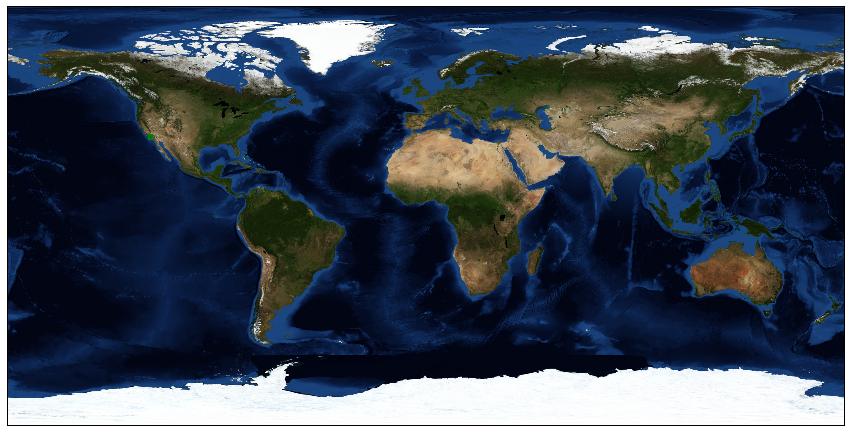

In [11]:
import time
import nexuscli
from datetime import datetime

from shapely.geometry import box

# TODO: Create a bounding box using the box method imported above
bbox = box(-118.9517, 32.7969, -117.6462, 34.8233)

# TODO: Plot the bounding box using the helper method plot_box
plot_box(bbox)

In [13]:
# Do not modify this line ##
start = time.perf_counter()#
############################


# TODO: Call the time_series method for the TRMM_3B42_daily_scrubbed dataset using 
# your bounding box and time period 1997-12-31 through 1998-12-31
datasets = ["TRMM_3B42_daily_scrubbed"]
start_time = datetime(1997, 12, 31)
end_time = datetime(1998, 12, 31, 23, 59, 59)

ts = nexuscli.time_series(datasets, bbox, start_time, end_time, spark=True)
trmm_ts = ts[0]

# Enter your code above this line
print("Time Series took {} seconds to generate".format(time.perf_counter() - start))


Time Series took 35.48413508757949 seconds to generate


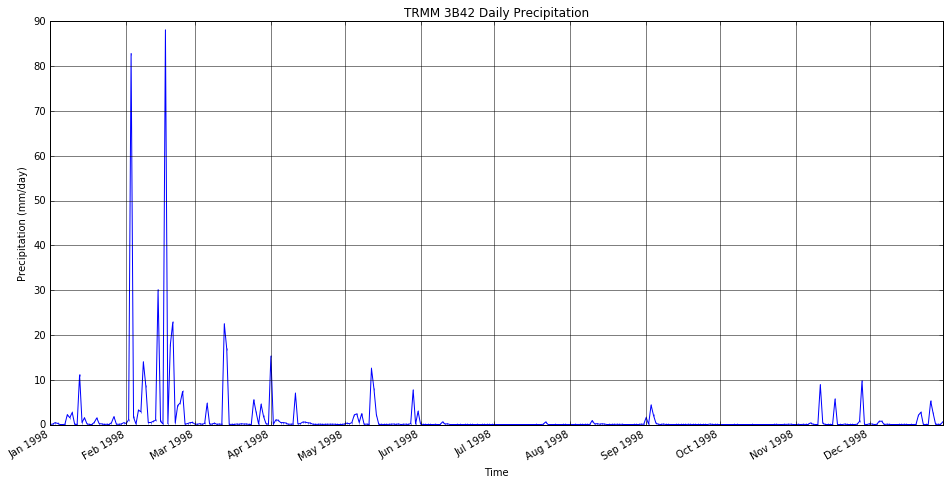

<module 'matplotlib.pyplot' from '/usr/local/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [16]:
# TODO: Plot the result using the `show_plot` helper method
show_plot([trmm_ts.time], [trmm_ts.mean], 'Time', 'Precipitation (mm/day)', title='TRMM 3B42 Daily Precipitation')


# Step 4: Comparing Data


In [ ]:
import nexuscli
import numpy
from datetime import datetime
from shapely.geometry import box

nexuscli.set_target("http://ec2-35-163-71-211.us-west-2.compute.amazonaws.com:8083", use_session=False)


la_county_river_ids = [17575859, 17574289, 17575711, 17574677, 17574823,
                       948070361, 22560728, 22560730, 22560738]
la_county_river_data = [nexuscli.subset("RAPID_WSWM", None, datetime(1997, 1, 1), 
                                        datetime(1998, 12, 31, 23, 59, 59), None, "rivid_i:{}".format(river_id))
                        for river_id in la_county_river_ids]
avg_discharge_rates = numpy.mean(numpy.array([[point.variable['variable'] for point in river] 
                               for river in la_county_river_data]), axis=0)
single_river_time_steps = numpy.array([point.time for point in next(iter(la_county_river_data))])


# TODO plot the two time series side by side using the show_plot_two_series helper method
show_plot_two_series(
    trmm_ts.time, single_river_time_steps, 
    trmm_ts.mean, avg_discharge_rates, 
    'Time', 'TRMM Precipitation L3 (mm/day)', 'Discharge (m³s⁻¹)',
    'TRMM 3B42 Daily Precipitation','Simulated Hydrological',
    align_axis=False
)